In [2]:
# Instalar librerías
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install 
# %pip install plotly
# %pip install nbformat

In [3]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.graph_objects as go

In [4]:
# Cargar DF
url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
df = pd.read_csv(url)

In [5]:
# Guardo el DF en CSV
df.to_csv('AB_NYC_2019.csv')

In [6]:
# Análisis del DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.shape

(48895, 16)

In [8]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [9]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [10]:
df['neighbourhood_group'].nunique()

5

In [11]:
df['name'].nunique()

47905

In [12]:
df['host_name'].nunique()

11452

In [13]:
df['host_id'].nunique()


37457

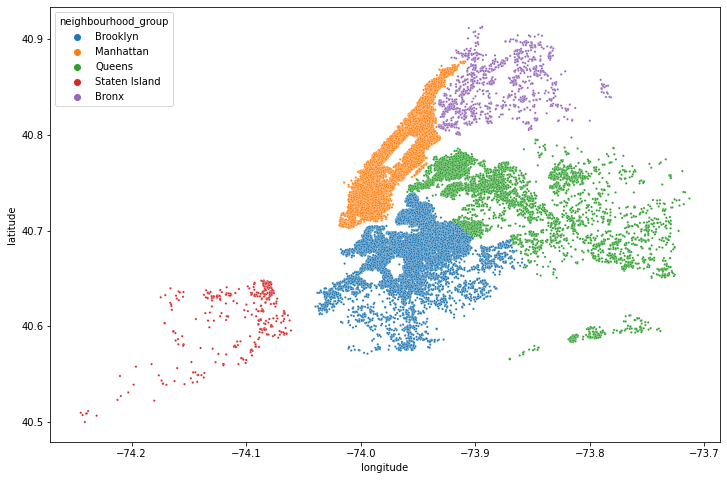

In [14]:


plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group,s=5)
plt.show()

In [15]:
df['room_type'].nunique()

3

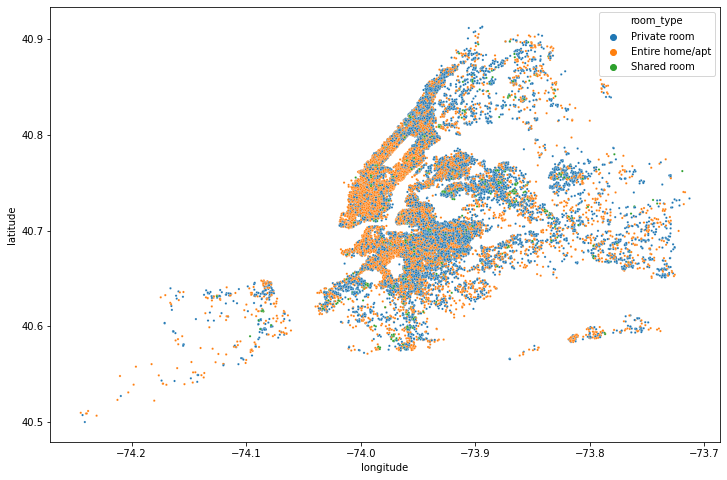

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.room_type,s=5)
plt.show()

In [17]:
df['neighbourhood'].nunique()

221

In [18]:
df['calculated_host_listings_count'].nunique()



47

In [19]:

from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

In [20]:
Long=-73.80
Lat=40.80
locations = list(zip(df.latitude, df.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [21]:
# 1 - Valores NaN lo mejor es cambiar los numeros por 0, o si es str poner un str vacio. Cambiamos last_review a tipo de dato correcto
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [22]:
df.fillna({'reviews_per_month':0},inplace=True)
df.fillna({'last_review':''},inplace=True)
df.fillna({'host_name':''},inplace=True)
df.fillna({'name':''},inplace=True)
df['last_review']=df['last_review'].astype('datetime64')

2- Como df['price'] tiene como minimo valores 0, partimos de un df sin price nulos para obtener los promedios por room_type y neighbourhood_group, para luego sistiuir los 0 por el promedio correspondiente al diccionario promedio

In [23]:

df_price = df[df['price'] > 0]
df_price.describe()

id       host_id      latitude     longitude         price  \
count  4.888400e+04  4.888400e+04  48884.000000  48884.000000  48884.000000   
mean   1.901679e+07  6.762203e+07     40.728953    -73.952176    152.755053   
std    1.098432e+07  7.861666e+07      0.054532      0.046159    240.170260   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420     10.000000   
25%    9.470548e+06  7.817310e+06     40.690100    -73.983080     69.000000   
50%    1.967574e+07  3.079257e+07     40.723080    -73.955685    106.000000   
75%    2.915297e+07  1.074344e+08     40.763120    -73.936290    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48884.000000       48884.000000       48884.000000   
mean         7.029887          23.271991           1.090800   
std         20.512224          44.551331           1.597213   
min          1.000000           0.000000           0.000000   
25%          1.000000           1.000000           0.040000   
50%          3.000000           5.000000           0.370000   
75%          5.000000          24.000000           1.580000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48884.000000      48884.000000  
mean                         7.144628        112.779498  
std                         32.956185        131.627271  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

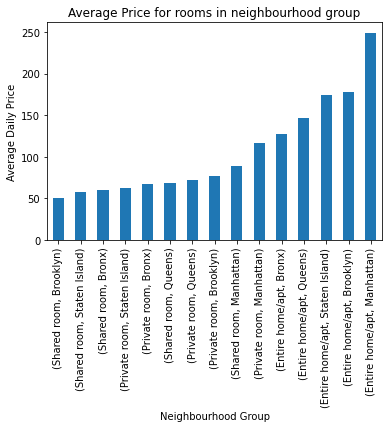

price
room_type       neighbourhood_group            
Entire home/apt Bronx                127.506596
                Queens               147.050573
                Staten Island        173.846591
                Brooklyn             178.346202
                Manhattan            249.257994
Private room    Staten Island         62.292553
                Bronx                 66.890937
                Queens                71.762456
                Brooklyn              76.545428
                Manhattan            116.776622
Shared room     Brooklyn              50.773723
                Staten Island         57.444444
                Bronx                 59.800000
                Queens                69.020202
                Manhattan             88.977083

In [24]:

df1 = df_price.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.show()


pd.DataFrame(df1).sort_values(by='room_type')

In [25]:
promedio=df1.to_dict()
promedio

{('Shared room', 'Brooklyn'): 50.77372262773723,
 ('Shared room', 'Staten Island'): 57.44444444444444,
 ('Shared room', 'Bronx'): 59.8,
 ('Private room', 'Staten Island'): 62.29255319148936,
 ('Private room', 'Bronx'): 66.89093701996927,
 ('Shared room', 'Queens'): 69.02020202020202,
 ('Private room', 'Queens'): 71.76245551601423,
 ('Private room', 'Brooklyn'): 76.54542761208769,
 ('Shared room', 'Manhattan'): 88.97708333333334,
 ('Private room', 'Manhattan'): 116.7766224004009,
 ('Entire home/apt', 'Bronx'): 127.5065963060686,
 ('Entire home/apt', 'Queens'): 147.05057251908397,
 ('Entire home/apt', 'Staten Island'): 173.8465909090909,
 ('Entire home/apt', 'Brooklyn'): 178.34620213433772,
 ('Entire home/apt', 'Manhattan'): 249.25799363539932}

In [26]:
def replace_null_price(price, room_type, neighbourhood_group ):
    if price == 0: 
        return promedio[(room_type, neighbourhood_group)]
    else:
        return price

In [27]:
df['price_not_null'] = df.apply(lambda x: replace_null_price(x['price'], x['room_type'], x['neighbourhood_group']), axis=1)

In [28]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         7.029962          23.274466           1.090910   
std         20.510550          44.550582           1.597283   
min          1.000000           0.000000           0.000000   
25%          1.000000           1.000000           0.040000   
50%          3.000000           5.000000           0.370000   
75%          5.000000          24.000000           1.580000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  price_not_null  
count                    48895.000000      48895.000000     48895.00000  
mean                         7.143982        112.781327       152.74227  
std                         32.952519        131.622289       240.14635  
min                          1.000000          0.000000        10.00000  
25%                          1.000000          0.000000        69.00000  
50%                          1.000000         45.000000       106.00000  
75%                          2.000000        227.000000       175.00000  
max                        327.000000        365.000000     10000.00000



3 - Outliers. Hacemos un tratamiento similar a los valores 0. Seleccionamos los outliers desde el boxplot y sustituimos el df['price] el promedio correspondiente al diccionario promedio.


Tomamos como outlier todo lo que se esté por debajo de 1.5 IQR (interquartile range ) y por encima de 1.5 IQR.


In [64]:

fig = go.Figure()
fig.add_trace(go.Box(x=df["price"], name="All"))


fig.update_layout({
    'xaxis': {
        'title_text': "All_df",
    },
    'yaxis': {
        'title_text': "Price",
    },
    })
fig.update_traces(orientation='h') # horizontal box plots
                
fig.show()

In [32]:
price_out = df['price'].describe()
print(price_out)

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


In [34]:
IQR = price_out['75%']-price_out['25%']
upper = price_out['75%'] + 1.5*IQR
lower = price_out['25%'] - 1.5*IQR
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper,lower))

The upper & lower bounds for suspected outliers are 334.0 and -90.0.


In [35]:
df[df['price'] > 9000]

id                                               name   host_id  \
6530    4737930                                 Spanish Harlem Apt   1235070   
9151    7003697                Furnished room in Astoria apartment  20582832   
12342   9528920                Quiet, Clean, Lit @ LES & Chinatown   3906464   
17692  13894339    Luxury 1 bedroom apt. -stunning Manhattan views   5143901   
29238  22436899                                1-BR Lincoln Center  72390391   
40433  31340283  2br - The Heart of NYC: Manhattans Lower East ...   4382127   

      host_name neighbourhood_group    neighbourhood  latitude  longitude  \
6530      Olson           Manhattan      East Harlem  40.79264  -73.93898   
9151   Kathrine              Queens          Astoria  40.76810  -73.91651   
12342       Amy           Manhattan  Lower East Side  40.71355  -73.98507   
17692      Erin            Brooklyn       Greenpoint  40.73260  -73.95739   
29238    Jelena           Manhattan  Upper West Side  40.77213  -73.98665   
40433      Matt           Manhattan  Lower East Side  40.71980  -73.98566   

             room_type  price  minimum_nights  number_of_reviews last_review  \
6530   Entire home/apt   9999               5                  1  2015-01-02   
9151      Private room  10000             100                  2  2016-02-13   
12342     Private room   9999              99                  6  2016-01-01   
17692  Entire home/apt  10000               5                  5  2017-07-27   
29238  Entire home/apt  10000              30                  0         NaT   
40433  Entire home/apt   9999              30                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
6530                0.02                               1                 0   
9151                0.04                               1                 0   
12342               0.14                               1                83   
17692               0.16                               1                 0   
29238               0.00                               1                83   
40433               0.00                               1               365   

       price_not_null  
6530           9999.0  
9151          10000.0  
12342          9999.0  
17692         10000.0  
29238         10000.0  
40433          9999.0

4 - Verificamos duplicados

In [36]:
df_2 = df['id'].duplicated().sum()

In [37]:
print(f'It seems that there are {df_2} duplicated accommodations according to the id')

It seems that there are 0 duplicated accommodations according to the id



5 - Evaluacion de relacion de precios con locacion

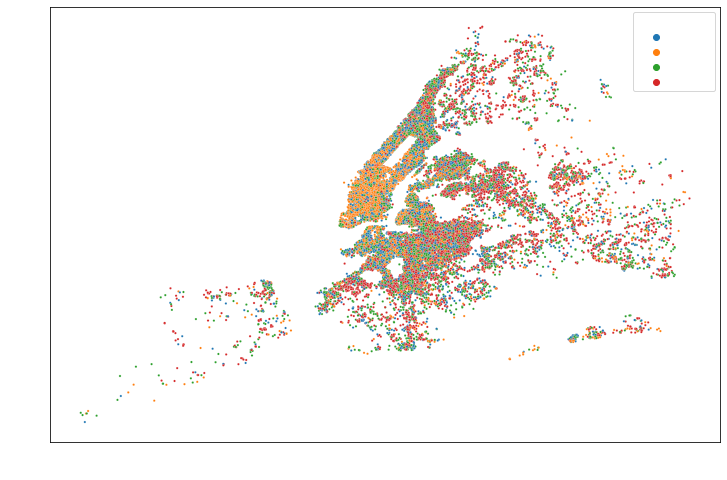

In [38]:
def categoria_precio(precio): 
    if precio <= 69: 
        return '25%' 
    elif precio <= 106 and precio > 69: 
        return '50%' 
    elif precio <= 175 and precio > 106: 
        return '70%' 
    else: return '100%'
    
df['price_category'] = df['price'].apply(categoria_precio)

plt.figure(figsize=(12,8)) 
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.price_category,s=5)
plt.show()


Podemos encontrar una asociacion de los precios mas altos con Manhattan como tambien lo vemos en el boxplot y el dataframe df1


6 - Evaluacion de posible correlaciones entre variable dependiente e independientes (categoricas y continuas)

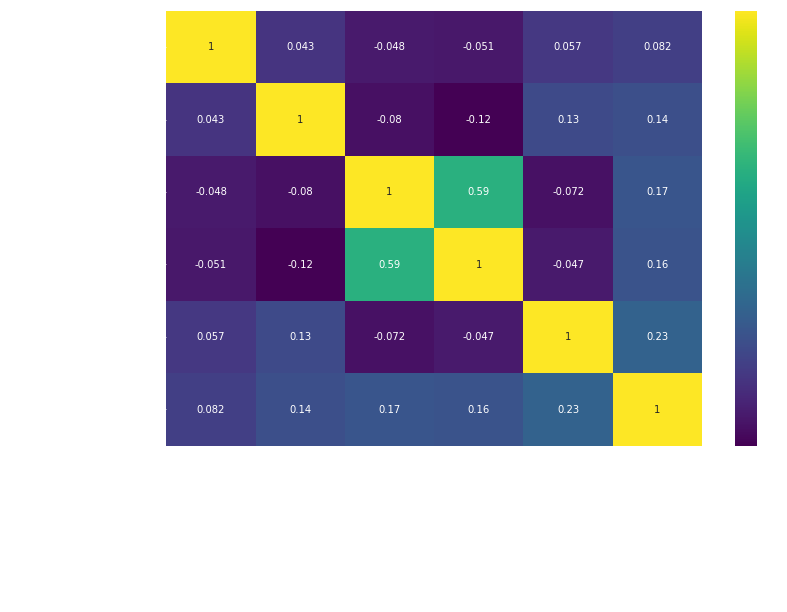

In [39]:
df_corr=df[['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',  'availability_365']]
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='viridis')
plt.show()


df['price'] correlaciones bajas para la variable dependiente con variables continuas

 (minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365)

In [40]:

fig = go.Figure()
fig.add_trace(go.Box(x=df.loc[df["neighbourhood_group"]== "Brooklyn" ,"price"], name="Brooklyn"))
fig.add_trace(go.Box(x=df.loc[df["neighbourhood_group"]== "Bronx" ,"price"], name="Bronx"))
fig.add_trace(go.Box(x=df.loc[df["neighbourhood_group"]== "Queens" ,"price"], name="Queens"))
fig.add_trace(go.Box(x=df.loc[df["neighbourhood_group"]== "Staten Island" ,"price"], name="Staten Island"))
fig.add_trace(go.Box(x=df.loc[df["neighbourhood_group"]== "Manhattan" ,"price"], name="Manhattan"))


fig.update_layout({
    'xaxis': {
        'title_text': "neighbourhood_group",
    },
    'yaxis': {
        'title_text': "Price",
    },
    })
fig.update_traces(orientation='h') # horizontal box plots               
fig.show()

In [41]:
fig = go.Figure()
fig.add_trace(go.Box(x=df.loc[df["room_type"]== 'Shared room' ,"price"], name='Shared room'))
fig.add_trace(go.Box(x=df.loc[df["room_type"]== 'Private room' ,"price"], name='Private room'))
fig.add_trace(go.Box(x=df.loc[df["room_type"]== 'Entire home/apt' ,"price"], name='Entire home/apt'))

fig.update_layout({
    'xaxis': {
        'title_text': "room_type",
    },
    'yaxis': {
        'title_text': "Price",
    },
    })
fig.update_traces(orientation='h') # horizontal box plots                 
fig.show()

Observamos mayores precios en Manhattan y en Apartamentos

7-Frecuencia de reservas

In [43]:
df_frec=df.groupby(['room_type','neighbourhood_group']).size().to_frame().rename(columns={0:'frecuency'})

In [44]:
df_frec

frecuency
room_type       neighbourhood_group           
Entire home/apt Bronx                      379
                Brooklyn                  9559
                Manhattan                13199
                Queens                    2096
                Staten Island              176
Private room    Bronx                      652
                Brooklyn                 10132
                Manhattan                 7982
                Queens                    3372
                Staten Island              188
Shared room     Bronx                       60
                Brooklyn                   413
                Manhattan                  480
                Queens                     198
                Staten Island                9

In [45]:
df_frec_plot=df_frec.sort_values(by=['frecuency'],ascending=[False])

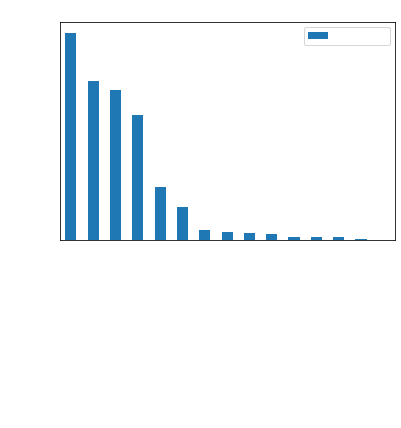

In [46]:
df_frec_plot.plot(kind='bar')
plt.title('Frecuency for rooms in neighbourhood group')
plt.ylabel('Frecuency')
plt.xlabel('Neighbourhood Group')
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.show()

Observamos que la mayor frecuencia de reserva es para los alojamientos de Manhattan y Brooklyn en entrie_home/apt y private_room representan el 84% de las reservas


8-Correlacion de frecuencia de reservas con variables continuas independientes

In [47]:
df_price_frec = df.groupby(['room_type','neighbourhood_group'])['price'].mean().reset_index(name="p_price")
df_price_frec

room_type neighbourhood_group     p_price
0   Entire home/apt               Bronx  127.506596
1   Entire home/apt            Brooklyn  178.327545
2   Entire home/apt           Manhattan  249.239109
3   Entire home/apt              Queens  147.050573
4   Entire home/apt       Staten Island  173.846591
5      Private room               Bronx   66.788344
6      Private room            Brooklyn   76.500099
7      Private room           Manhattan  116.776622
8      Private room              Queens   71.762456
9      Private room       Staten Island   62.292553
10      Shared room               Bronx   59.800000
11      Shared room            Brooklyn   50.527845
12      Shared room           Manhattan   88.977083
13      Shared room              Queens   69.020202
14      Shared room       Staten Island   57.444444

In [48]:
df_frec.reset_index()

room_type neighbourhood_group  frecuency
0   Entire home/apt               Bronx        379
1   Entire home/apt            Brooklyn       9559
2   Entire home/apt           Manhattan      13199
3   Entire home/apt              Queens       2096
4   Entire home/apt       Staten Island        176
5      Private room               Bronx        652
6      Private room            Brooklyn      10132
7      Private room           Manhattan       7982
8      Private room              Queens       3372
9      Private room       Staten Island        188
10      Shared room               Bronx         60
11      Shared room            Brooklyn        413
12      Shared room           Manhattan        480
13      Shared room              Queens        198
14      Shared room       Staten Island          9

In [49]:
df_price_frec['p_price'].corr(df_frec.reset_index()['frecuency'])

0.6120598380831245


Obtenemos una correlación positiva entre frecuencia y precio agrupados por room_type y neighbourhood_group, por lo tanto, verificamos si ocurre lo mismo con las otras 5 variables independientes continuas.

In [50]:
df_b = df.groupby(['room_type','neighbourhood_group'])['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',  'availability_365'].mean().reset_index()
df_b

/var/folders/dq/rdx2683d5277dp58kg7qjlqr0000gp/T/ipykernel_3407/2087259573.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



room_type neighbourhood_group       price  minimum_nights  \
0   Entire home/apt               Bronx  127.506596        5.957784   
1   Entire home/apt            Brooklyn  178.327545        6.531332   
2   Entire home/apt           Manhattan  249.239109       10.539283   
3   Entire home/apt              Queens  147.050573        5.369752   
4   Entire home/apt       Staten Island  173.846591        6.238636   
5      Private room               Bronx   66.788344        3.858896   
6      Private room            Brooklyn   76.500099        5.539479   
7      Private room           Manhattan  116.776622        5.446880   
8      Private room              Queens   71.762456        5.120107   
9      Private room       Staten Island   62.292553        3.632979   
10      Shared room               Bronx   59.800000        3.366667   
11      Shared room            Brooklyn   50.527845        7.753027   
12      Shared room           Manhattan   88.977083        6.766667   
13      Shared room              Queens   69.020202        4.232323   
14      Shared room       Staten Island   57.444444        2.333333   

    number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0           30.678100           1.824749                        1.865435   
1           27.945183           1.125341                        1.837849   
2           17.815516           0.862068                       18.922721   
3           28.933206           1.635038                        1.677958   
4           33.278409           1.767955                        1.596591   
5           25.018405           1.319371                        2.338957   
6           21.086952           0.990650                        2.547177   
7           26.202706           1.145254                        3.188048   
8           27.746441           1.548200                        5.559905   
9           30.159574           1.437074                        2.840426   
10           7.200000           0.968833                        3.416667   
11          14.026634           0.752010                        6.171913   
12          21.400000           1.329646                        3.885417   
13          13.863636           1.169091                        3.737374   
14           1.555556           0.740000                        5.555556   

    availability_365  
0         158.000000  
1          97.205147  
2         117.140996  
3         132.267176  
4         178.073864  
5         171.331288  
6          99.917983  
7         101.845026  
8         149.222716  
9         226.361702  
10        154.216667  
11        178.007264  
12        138.572917  
13        192.186869  
14         64.777778

In [51]:
df_c=pd.concat([df_b, df_frec.reset_index()['frecuency'].reindex()], axis=1)

In [52]:
df_c

room_type neighbourhood_group       price  minimum_nights  \
0   Entire home/apt               Bronx  127.506596        5.957784   
1   Entire home/apt            Brooklyn  178.327545        6.531332   
2   Entire home/apt           Manhattan  249.239109       10.539283   
3   Entire home/apt              Queens  147.050573        5.369752   
4   Entire home/apt       Staten Island  173.846591        6.238636   
5      Private room               Bronx   66.788344        3.858896   
6      Private room            Brooklyn   76.500099        5.539479   
7      Private room           Manhattan  116.776622        5.446880   
8      Private room              Queens   71.762456        5.120107   
9      Private room       Staten Island   62.292553        3.632979   
10      Shared room               Bronx   59.800000        3.366667   
11      Shared room            Brooklyn   50.527845        7.753027   
12      Shared room           Manhattan   88.977083        6.766667   
13      Shared room              Queens   69.020202        4.232323   
14      Shared room       Staten Island   57.444444        2.333333   

    number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0           30.678100           1.824749                        1.865435   
1           27.945183           1.125341                        1.837849   
2           17.815516           0.862068                       18.922721   
3           28.933206           1.635038                        1.677958   
4           33.278409           1.767955                        1.596591   
5           25.018405           1.319371                        2.338957   
6           21.086952           0.990650                        2.547177   
7           26.202706           1.145254                        3.188048   
8           27.746441           1.548200                        5.559905   
9           30.159574           1.437074                        2.840426   
10           7.200000           0.968833                        3.416667   
11          14.026634           0.752010                        6.171913   
12          21.400000           1.329646                        3.885417   
13          13.863636           1.169091                        3.737374   
14           1.555556           0.740000                        5.555556   

    availability_365  frecuency  
0         158.000000        379  
1          97.205147       9559  
2         117.140996      13199  
3         132.267176       2096  
4         178.073864        176  
5         171.331288        652  
6          99.917983      10132  
7         101.845026       7982  
8         149.222716       3372  
9         226.361702        188  
10        154.216667         60  
11        178.007264        413  
12        138.572917        480  
13        192.186869        198  
14         64.777778          9

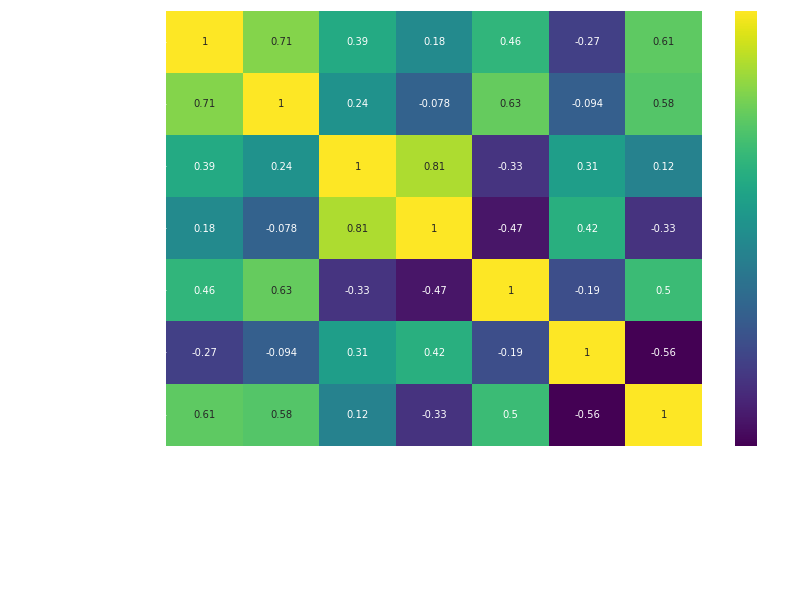

In [53]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_c.corr(), annot=True, cmap='viridis')
plt.show()



Price: correlación positiva con minimum_nights, frecuency. 

Se observa que los mas caros son los que mas se reservan y exigen un minimo de noches de estadia mayor.


Frecuency: correlación positiva con price, calculated_host_listing_count y minimum_nights. Correlación negativa con availability_365. Complementando lo analizado para price, frecuency indica: Se observa que los mas caros son los que mas se reservan, exigen un minimo de noches de estadia mayor y son los que menos estan disponibles durante todo el año.


9 - Establecimientos con mayor reservas

In [54]:
df_frec_host=df.groupby(['name'])['latitude', 'longitude'].size().to_frame().rename(columns={0:'frecuency_host'}).sort_values(by=['frecuency_host'],ascending=[False])

/var/folders/dq/rdx2683d5277dp58kg7qjlqr0000gp/T/ipykernel_3407/2290825589.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [55]:
df_frec_host.head(10)

frecuency_host
name                                                      
Hillside Hotel                                          18
Home away from home                                     17
                                                        16
New york Multi-unit building                            16
Brooklyn Apartment                                      12
Private Room                                            11
Loft Suite @ The Box House Hotel                        11
Artsy Private BR in Fort Greene Cumberland              10
Private room                                            10
Cozy Brooklyn Apartment                                  8

In [56]:
df_frec_host.shape

(47906, 1)

In [57]:
df_frec_host.head(10)

frecuency_host
name                                                      
Hillside Hotel                                          18
Home away from home                                     17
                                                        16
New york Multi-unit building                            16
Brooklyn Apartment                                      12
Private Room                                            11
Loft Suite @ The Box House Hotel                        11
Artsy Private BR in Fort Greene Cumberland              10
Private room                                            10
Cozy Brooklyn Apartment                                  8

In [58]:
df_frec_host.tail(10)

frecuency_host
name                                                             
Cozy home in charming, central Fort Greene                      1
Cozy home in friendly & hip Bushwick near subway                1
Cozy home in south Williamsburg                                 1
Cozy home in the heart of Astoria                               1
Cozy home in vibrant Manhattan                                  1
Cozy home, away from home. 15 mins from downtown.               1
Cozy house , very quiet , clean room !                          1
Cozy house in Sunnyside gardens                                 1
Cozy in Bedstuy                                                 1
ﾏﾝﾊｯﾀﾝ､駅から徒歩4分でどこに行くのにも便利な場所!女性の方希望,ｷﾚｲなお部屋｡                    1

In [59]:

def popularidad(frecuency_host): 
    if frecuency_host <= 1: 
        return 'baja_popularidad' 
    elif frecuency_host <= 10: 
        return 'media_popularidad' 
    else: return 'alta_popularidad'
    
df_frec_host['popularidad'] = df_frec_host['frecuency_host'].apply(popularidad)

In [60]:
df_frec_host_n=df_frec_host.groupby(['popularidad']).size().to_frame().rename(columns={0:'popularidad_count'}).sort_values(by=['popularidad_count'],ascending=[False])

In [61]:
df_frec_host_n

popularidad_count
popularidad                         
baja_popularidad               47260
media_popularidad                639
alta_popularidad                   7

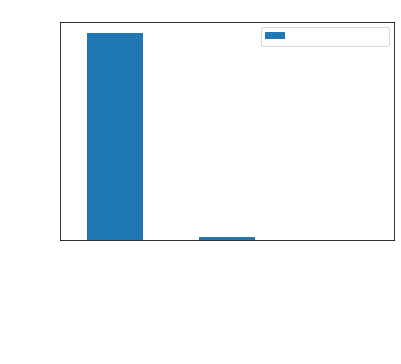

In [63]:
df_frec_host_n.plot(kind='bar')
plt.title('Frecuency by Popularity')
plt.ylabel('Frecuency')
plt.xlabel('Neighbourhood Group')
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.show()


Observamos que el 99% de las reservas ocurren en establecimientos con baja popularidad